In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore");

In [2]:
from sklearn.utils import resample

# Load dataset
df = pd.read_csv("uci-secom.csv")

# Identify and drop timestamp columns
date_columns = [col for col in df.columns if "time" in col.lower()]
df.drop(columns=date_columns, inplace=True, errors='ignore')

# Data Cleaning: Remove columns with >80% missing values
missing_threshold = 0.8
df_cleaned = df.dropna(thresh=int((1 - missing_threshold) * df.shape[0]), axis=1)

# Impute remaining missing values with median
df_cleaned.fillna(df_cleaned.median(), inplace=True)

In [3]:
# Define target variable
df_cleaned.rename(columns={df_cleaned.columns[-1]: "Pass/Fail"}, inplace=True)

# Split features and target
X = df_cleaned.drop(columns=["Pass/Fail"])
y = df_cleaned["Pass/Fail"]

In [4]:
# Display basic statistics
df_cleaned.describe()


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.441551,2495.866110,2200.551958,1395.383474,4.171281,100.0,101.116476,0.121825,1.462860,-0.000842,...,82.403069,0.500096,0.015317,0.003846,3.067628,0.021458,0.016474,0.005283,99.652345,-0.867262
std,73.480841,80.228143,29.380973,439.837330,56.103721,0.0,6.209385,0.008936,0.073849,0.015107,...,56.348694,0.003403,0.017174,0.003719,3.576899,0.012354,0.008805,0.002866,93.864558,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,72.288900,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.0,104.530000,0.123800,1.516850,0.008400,...,72.288900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


# Univariate Analysis

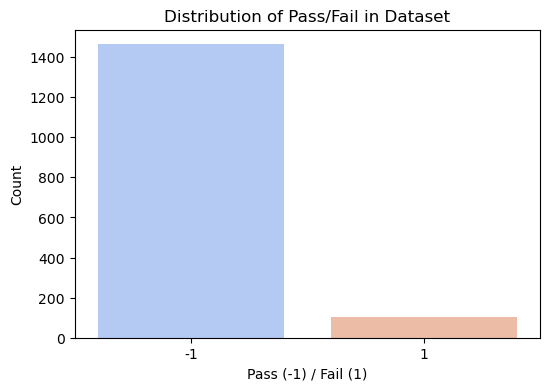

In [5]:

# Histogram for Target Variable
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of Pass/Fail in Dataset")
plt.xlabel("Pass (-1) / Fail (1)")
plt.ylabel("Count")
plt.show()


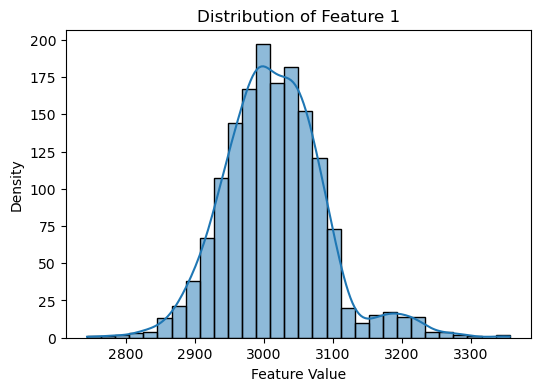

In [6]:
# Distribution of a Sample Feature
plt.figure(figsize=(6,4))
sns.histplot(X.iloc[:, 0], kde=True, bins=30)
plt.title("Distribution of Feature 1")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()


# Bivariate Analysis

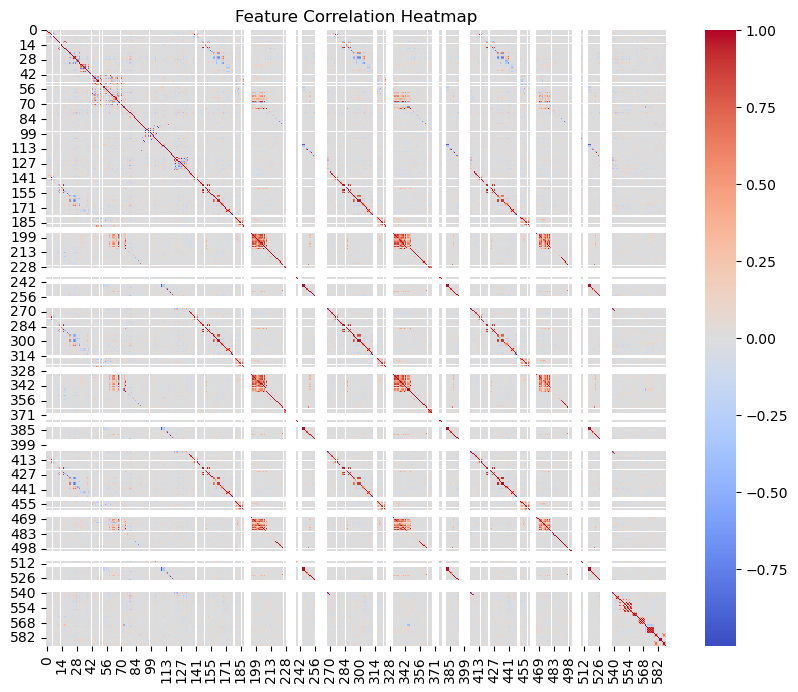

In [7]:

# Correlation Heatmap
plt.figure(figsize=(10,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


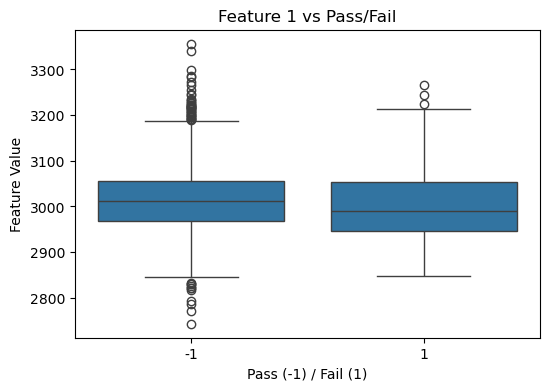

In [8]:
# Boxplot of a Feature Against the Target Variable
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=X.iloc[:, 0])
plt.title("Feature 1 vs Pass/Fail")
plt.xlabel("Pass (-1) / Fail (1)")
plt.ylabel("Feature Value")
plt.show()


# Multivariate Analysis

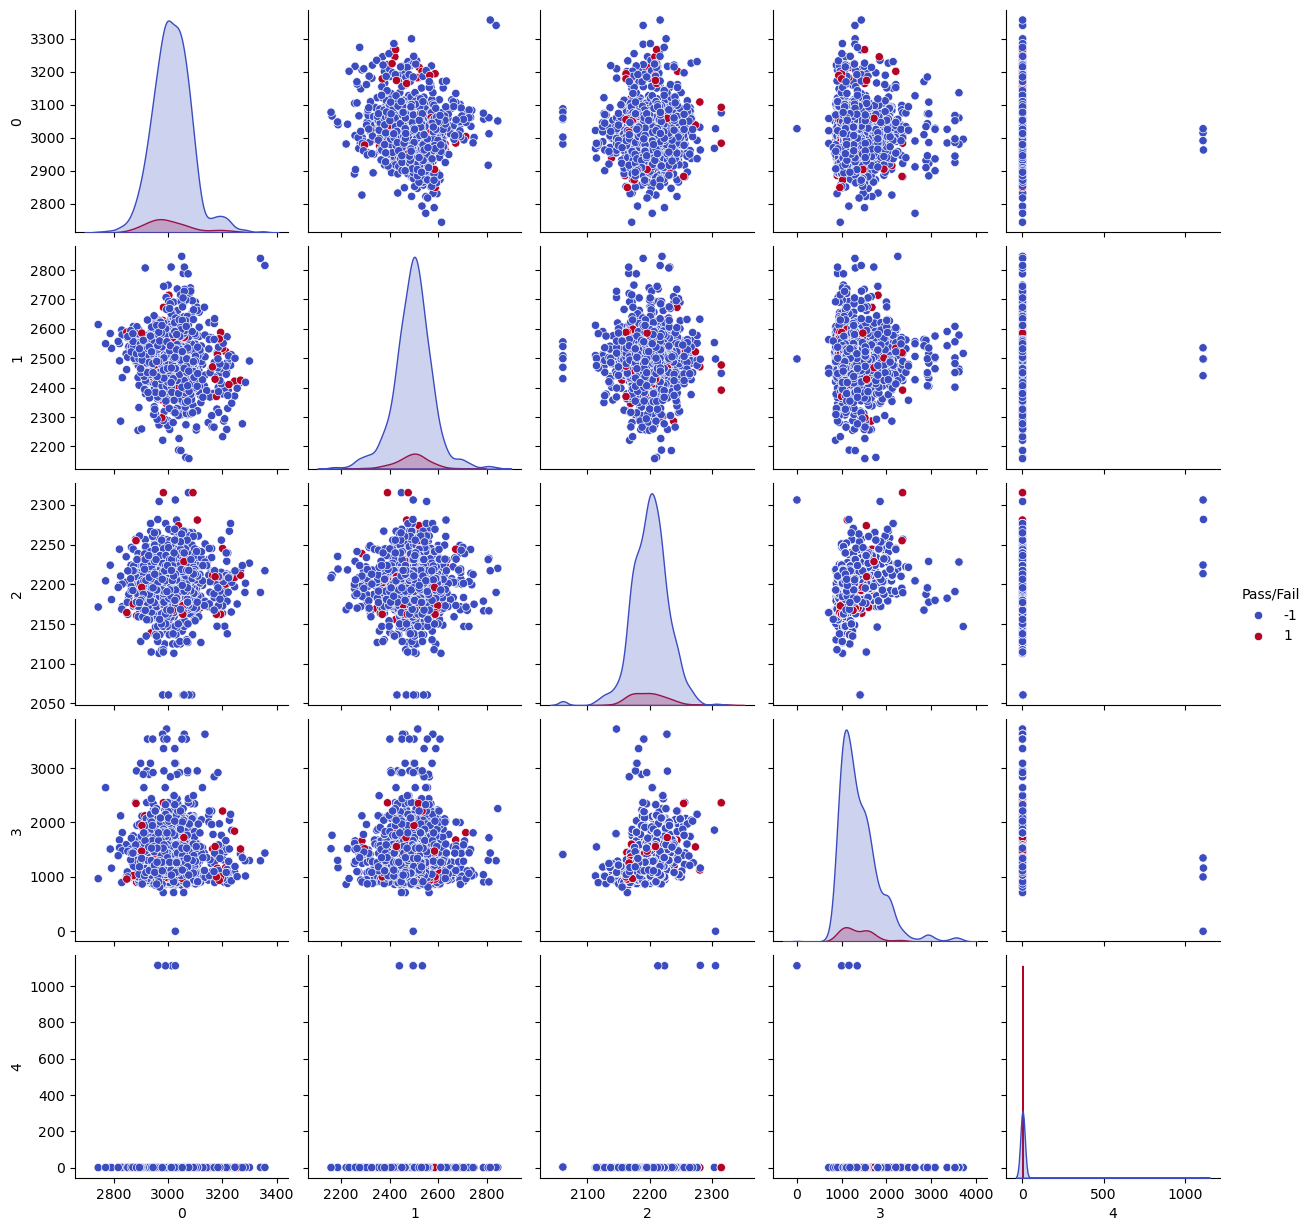

In [9]:

# Pairplot of Selected Features
sample_features = X.iloc[:, :5]  # Taking first 5 features
df_sample = pd.concat([sample_features, y], axis=1)
sns.pairplot(df_sample, hue="Pass/Fail", palette="coolwarm")
plt.show()
